We need the opencv package to access cv2. This requires python 3.8

In [2]:
# %pip install opencv-python-headless==4.5.3.56 # this is the only thing that works!!
import cv2

The Pillow package is a package used to manipulate images. I think that this could be really useful to remove shadows from images

In [3]:
# pip install pillow
import PIL
from PIL import Image
from IPython.display import display

In [4]:
import numpy as np

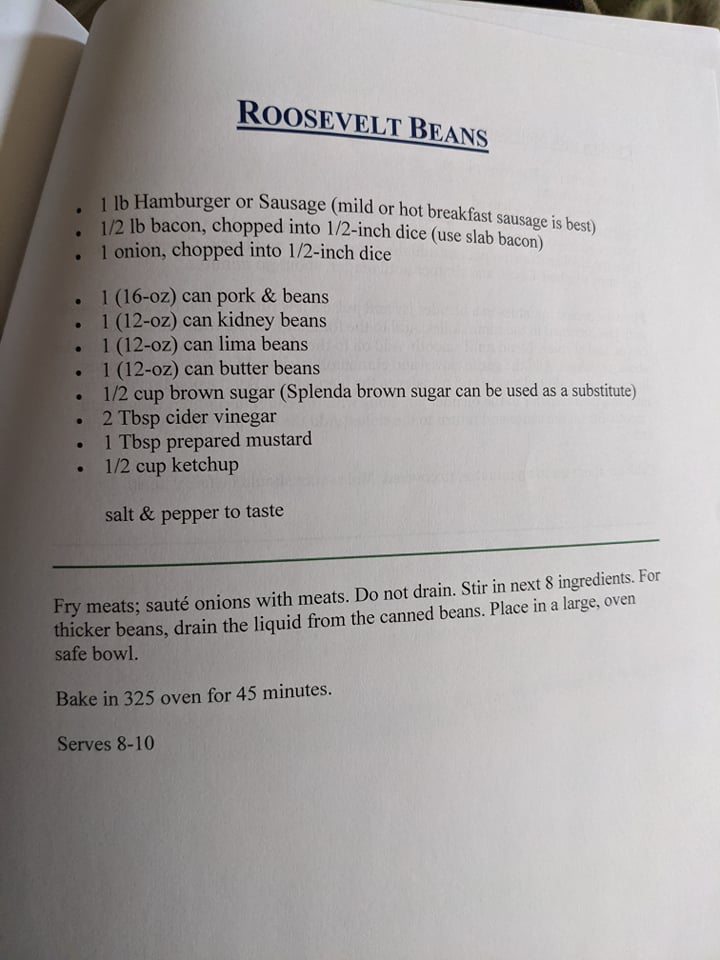

In [5]:
img_path = '/workspaces/recipe_reader/images_jpg/image_2.jpg'
img = Image.open(img_path)
display(img)

In [6]:
img = cv2.imread(img_path, -1)

rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
    
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out.jpg', result)
cv2.imwrite('shadows_out_norm.jpg', result_norm)

True

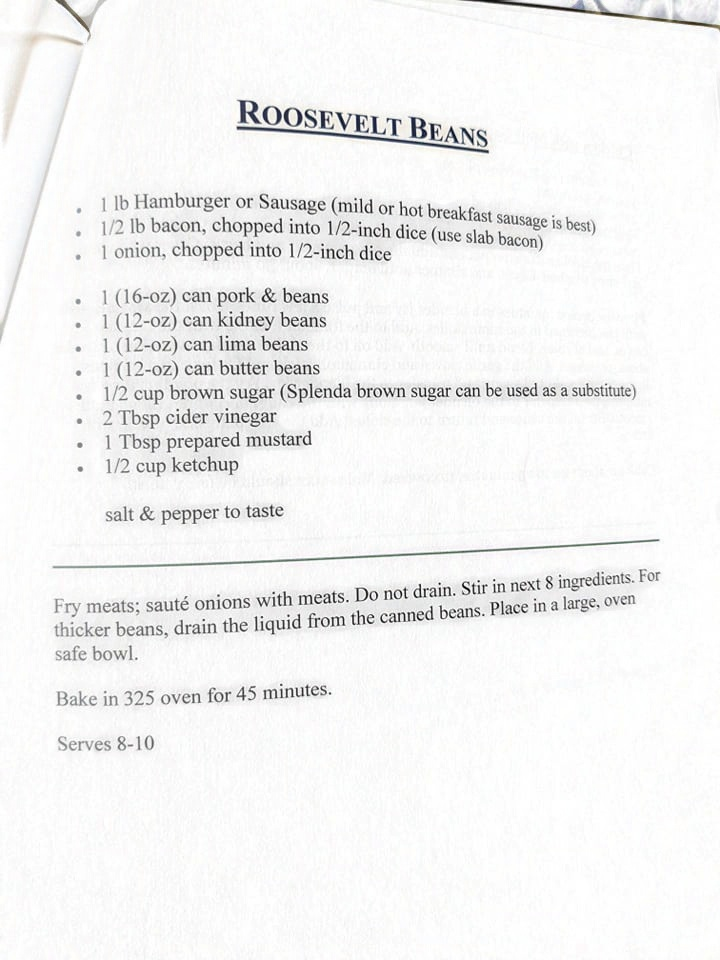

In [8]:
img_path = '/workspaces/recipe_reader/shadows_out_norm.jpg'
img = Image.open(img_path)
display(img)